In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

##### [과제] employees 테이블을 불러와서 다음사항을 수행하세요
---
- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화


In [6]:
con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor=con.cursor()
sql="select * from employees"
cursor.execute(sql)
x=cursor.fetchall()
df_col=pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")
col=cursor.fetchall()
list_py=[]
for i in col:
    for j in i:
        list_py.append(j)
df_col.columns=list_py
cursor.close()
con.close()
df_col
col

[('EMPLOYEE_ID',),
 ('FIRST_NAME',),
 ('LAST_NAME',),
 ('EMAIL',),
 ('PHONE_NUMBER',),
 ('HIRE_DATE',),
 ('JOB_ID',),
 ('SALARY',),
 ('COMMISSION_PCT',),
 ('MANAGER_ID',),
 ('DEPARTMENT_ID',)]

In [7]:
con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor=con.cursor()
sql="select department_id, avg(salary) from employees group by department_id order by department_id"
x = cursor.execute(sql).fetchall()
# cursor.execute(sql)
# x=cursor.fetchall()
df_col=pd.DataFrame(x)
df_col.columns=['부서','평균연봉']
cursor.close()
con.close()
df_col
x

[(10, 4400),
 (20, 9500),
 (30, 4150),
 (40, 6500),
 (50, 3475.5555555555557),
 (60, 5760),
 (70, 10000),
 (80, 8955.882352941177),
 (90, 19333.333333333332),
 (100, 8601.333333333334),
 (110, 10154),
 (None, 7000)]

<AxesSubplot:ylabel='부서'>

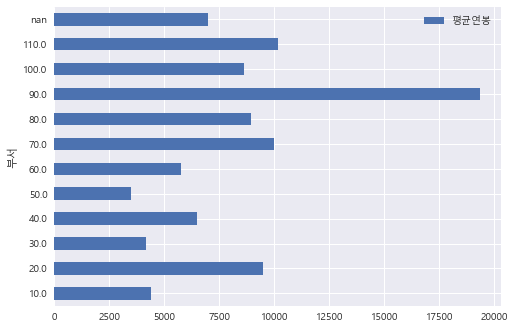

In [52]:
df_col.plot.barh(x='부서', y='평균연봉')

<AxesSubplot:xlabel='평균연봉', ylabel='부서'>

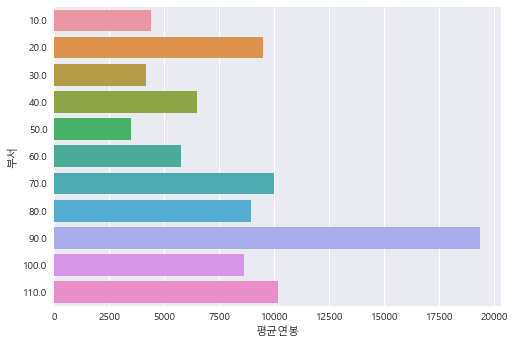

In [39]:
sns.barplot(data = df_col, x='평균연봉', y='부서', orient = 'h')

##### [과제] PURPROD 테이블을 불러와서 다음사항을 수행하세요.
---
- 고객별 2014년 2015년 총구매액 및 평균구매액 출력
- 고객별 2014 VS 2015 총구매액 기준 성장율

In [11]:
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ="SELECT 고객번호,year, SUM(구매금액) , ROUND(AVG(구매금액)) FROM purprod GROUP BY year, 고객번호 ORDER BY 고객번호"
cursor.execute(sql)
x = cursor.fetchall()
columns = ['custid','year','sum','avg']
df1 = pd.DataFrame(x,columns=columns)
display(df1)
cursor.close()
con.commit()
con.close()

,custid,year,sum,avg
0,00001,2014,54041667,90979
1,00001,2015,31000883,66957
2,00002,2014,46245330,75812
3,00002,2015,53635430,105999
4,00003,2014,1893769,2563
...,...,...,...,...
38701,19380,2014,522700,30747
38702,19380,2015,3390277,8015
38703,19381,2015,6040669,7504
38704,19382,2015,4401773,4858


In [33]:
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='SELECT a.고객번호, ROUND(("2015구매" - "2014구매")/"2014구매" * 100, 2) "성장률" \
FROM (SELECT 고객번호, SUM(구매금액) "2014구매" FROM PURPROD WHERE YEAR = 2014 GROUP BY 고객번호 ORDER BY 고객번호) a, \
     (SELECT 고객번호, SUM(구매금액) "2015구매" FROM PURPROD WHERE YEAR = 2015 GROUP BY 고객번호 ORDER BY 고객번호) b \
WHERE a.고객번호 = b.고객번호'
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '매출 성장률']
df1 = pd.DataFrame(x,columns=columns)
display(df1)
cursor.close()
con.commit()
con.close()

,고객번호,매출 성장률
0,00001,-42.64
1,00002,15.98
2,00003,-32.86
3,00004,-20.49
4,00005,-27.77
...,...,...
19318,19376,2386.40
19319,19377,2685.22
19320,19378,3693.11
19321,19379,285.40


In [2]:
import cx_Oracle
import pandas as pd
con = cx_Oracle.connect("LM_PDB","LM","localhost:1521/xepdb1")
cursor = con.cursor()
cursor.execute("select * from PURBYYEAR")
x = cursor.fetchall()

cursor.execute("select column_name from user_tab_columns where table_name='PURBYYEAR'")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)

df = pd.DataFrame(x,columns=col_list)
df.head()

,고객번호,YEAR,구매액
0,00001,2014,54041667
1,00001,2015,31000883
2,00002,2014,46245330
3,00002,2015,53635430
4,00003,2014,1893769


In [24]:
df_pv1 = df.pivot(index='고객번호',columns='YEAR',values='구매액')
df_pv2 = df_pv1.reset_index()
df_pv3= df_pv2.set_index(keys=['고객번호'])
df_pv3.head()

YEAR,2014,2015
고객번호,,
00001,54041667.0,31000883.0
00002,46245330.0,53635430.0
00003,1893769.0,1271398.0
00004,9299616.0,7394194.0
00005,7685880.0,5551190.0


In [32]:
df_pv3['성장율'] = (df_pv3[2015]-df_pv3[2014])/df_pv3[2014] 
df_pv3.head()

YEAR,2014,2015,성장율
고객번호,,,
00001,54041667.0,31000883.0,-0.426352
00002,46245330.0,53635430.0,0.159802
00003,1893769.0,1271398.0,-0.328641
00004,9299616.0,7394194.0,-0.204893
00005,7685880.0,5551190.0,-0.277742
